Recamán's sequence (or Recaman's sequence): $a(0) = 0;\ for\ n > 0,\ a(n) = a(n-1) - n$ if positive and not already in the sequence, otherwise $a(n) = a(n-1) + n$

$$ a(n) = a(n-1)-n $$
$$ a(n) = a(n - 1) + n$$

In [148]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

In [2]:
def recaman_np(n):
    sequence = np.zeros(n, dtype=int)
    idx = 0

    for i in range(1, n):
        idx -= i 
        if (idx > 0) and (idx not in sequence):
            sequence[i] = idx
        else:
            idx += i*2
            sequence[i] = idx
    return sequence

In [3]:
# implementation from the wild
def recaman(n):
 
    # Create an array to store terms
    arr = [0] * n
 
    # First term of the sequence
    # is always 0
    arr[0] = 0
 
    # Fill remaining terms using
    # recursive formula.
    for i in range(1, n):
     
        curr = arr[i-1] - i
        for j in range(0, i):
         
            # If arr[i-1] - i is
            # negative or already
            # exists.
            if ((arr[j] == curr) or curr < 0):
                curr = arr[i-1] + i
                break
             
        arr[i] = curr
    return arr

In [6]:
n = 10000

In [7]:
assert len(recaman_np(n)) == n

In [8]:
%timeit recaman_np(n)

133 ms ± 2.24 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [9]:
%timeit recaman(n)

3.7 s ± 163 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [10]:
seq_np = recaman_np(n)
seq_py = recaman(n)

In [14]:
np.allclose(seq_np, seq_py)

True

In [15]:
seq = seq_np

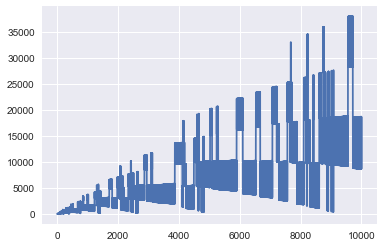

In [17]:
plt.plot(seq)

# Draw circles

+ fer radi tan gran com la diferència al següent element

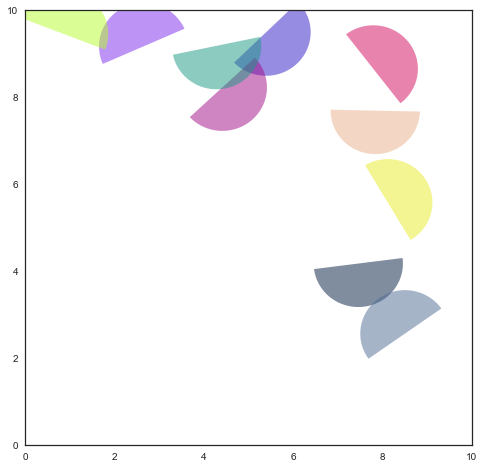

In [110]:
import numpy.random as rnd
import numpy as np

def arc_patch(xy, width, height, theta1=0., theta2=180., resolution=50, **kwargs):

    # generate the points
    theta = np.linspace(np.radians(theta1), np.radians(theta2), resolution)
    points = np.vstack((width*np.cos(theta)  + xy[0], 
                        height*np.sin(theta) + xy[1]))
    # build the polygon and add it to the axes
    poly = patches.Polygon(points.T, closed=True, **kwargs)

    return poly

NUM = 10
arcs = []
for i in range(NUM):
    r = rnd.rand()*360.
    arcs.append(arc_patch(xy=rnd.rand(2)*10, width=1., 
                height=1., theta1=r, theta2=r+180.))

# axis settings
fig, ax = plt.subplots(1,1, figsize=(8,8))
for a in arcs:
    ax.add_artist(a)
    a.set_clip_box(ax.bbox)
    a.set_alpha(0.5)
    a.set_facecolor(rnd.rand(3))

ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

plt.show()

array([0.34593729, 0.05374749, 0.08199769])

In [92]:
seq[:10]

array([ 0,  1,  3,  6,  2,  7, 13, 20, 12, 21])

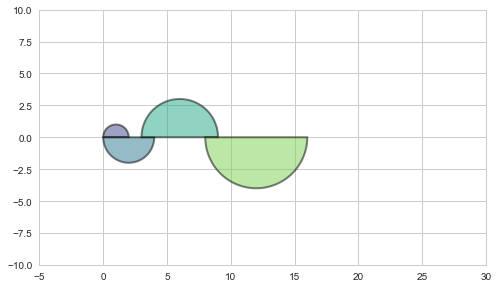

In [208]:
from itertools import chain, repeat
def ncycles(iterable, n):
    "Returns the sequence elements n times"
    return chain.from_iterable(repeat(iterable, n))

R = (0, 180)
n = 2
palette = sns.color_palette('viridis', n*2)
arcs = []
for i, r in enumerate(ncycles(R, n)):
    
    step = abs(seq[i+1] - seq[i])
    next_step = seq[i+2] - seq[i+1]
    if i == 0:
        root = 1
    elif step <= 0 :
        root = step*2
    else:
        root = seq[i]*2
        
    a = arc_patch(xy=(root,0), width=step, height=step, theta1=r, theta2=r+180)
    arcs.append(a)
    
fig, ax = plt.subplots(1,1, figsize=(8,8), subplot_kw={'aspect':'equal'})
for c, a in enumerate(arcs):
    ax.add_artist(a)
#     a.set_clip_box(ax.bbox)
    a.set_alpha(0.5)
#     a.set_facecolor('none')
    a.set_facecolor(palette[c])
    a.set_edgecolor('black')
    a.set_linewidth(2)

ax.set_xlim(-5, 30)
ax.set_ylim(-10, 10)
# ax.axis('off')

plt.show()

In [130]:
for i, r in enumerate(ncycles(R, n)):
    print(i, r)

0 0
1 180
2 0
3 180
